In [1]:
# Necessary libraries and modules
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.manifold import TSNE
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.family'] = 'AppleGothic'
warnings.filterwarnings("ignore")
%matplotlib inline

# Sample data preparation
docs = [
    ['고양이', '강아지', '찾아줘', '우리', '동네', '어딘가', '에', '있어'],
    ['고양이', '찾아줘'],
    ['강아지', '찾아줘'],
    ['우리', '동네', '어딘가', '에', '있어', '맛집', '이']
]

word1 = []
word2 = []
for lst in docs:
    for i in range(len(lst)-1):
        word1.append(lst[i])
        word2.append(lst[i+1])

df = pd.DataFrame({'word1': word1, 'word2': word2})


In [2]:
# One-hot encoding
words = ['강아지', '고양이', '동네', '맛집', '어딘가', '에', '우리', '이', '있어', '찾아줘']

word_dict = {}
for i, word in enumerate(words):
    word_dict[word] = i

df['word1'] = df['word1'].map(word_dict)
df['word2'] = df['word2'].map(word_dict)


In [11]:
# Neural Network Model
model = keras.Sequential()

model.add(keras.layers.Dense(100, input_dim=1))
model.add(keras.layers.Dense(50))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=300, restore_best_weights=True, monitor='acc')

model.fit(df['word1'], df['word2'], epochs=2000, callbacks=[early_stopping_cb], verbose=1)


Epoch 1/2000


2023-09-13 11:02:55.566861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 485ms/step - loss: 2.9888 - acc: 0.0667
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 2.6864 - acc: 0.0667
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 2.4479 - acc: 0.0667
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.2883 - acc: 0.0667
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.2032 - acc: 0.0667
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.1643 - acc: 0.0667
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.1453 - acc: 0.0667
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 2.1349 - acc: 0.0667
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 2.1299 - acc: 0.1333
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.1294 - acc: 0.1333
Epoch 11/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.13

In [12]:
# Predictions
predictions_input = [model.predict([x]) for x in df['word1']]
predictions_target = [model.predict([x]) for x in df['word2']]

predictions_input = np.array(predictions_input).reshape(len(predictions_input), -1)
predictions_target = np.array(predictions_target).reshape(len(predictions_target), -1)

1/1 [==============================] - 0s 18ms/step


2023-09-13 11:03:07.203141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 18ms/step


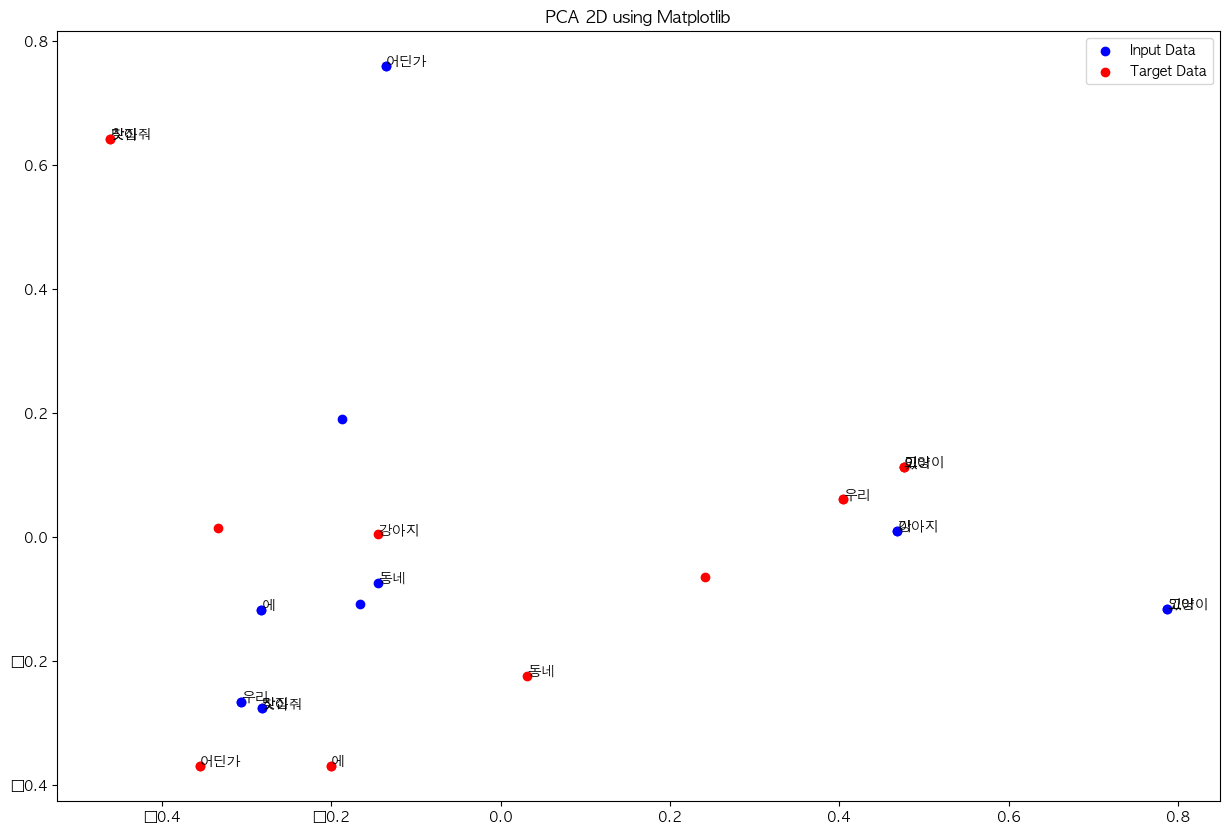

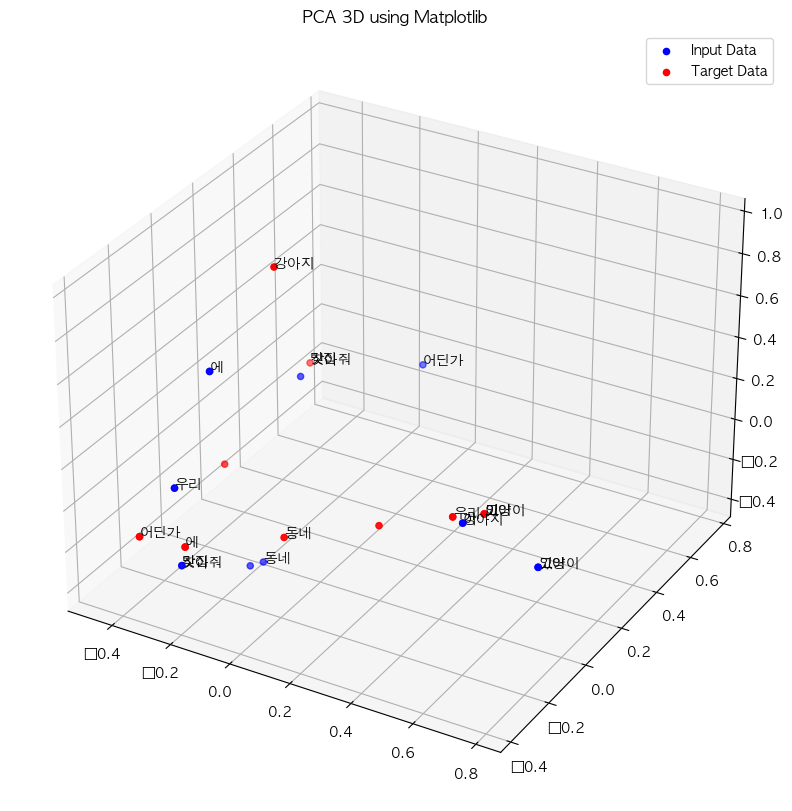

In [13]:


# PCA for 2D
pca_2d = PCA(n_components=2)
reduced_input_2d = pca_2d.fit_transform(predictions_input)
reduced_target_2d = pca_2d.fit_transform(predictions_target)

# Visualization using Matplotlib for 2D
plt.figure(figsize=(15, 10))
plt.scatter(reduced_input_2d[:, 0], reduced_input_2d[:, 1], color='blue', label='Input Data')
plt.scatter(reduced_target_2d[:, 0], reduced_target_2d[:, 1], color='red', label='Target Data')
for i, word in enumerate(words):
    plt.annotate(word, (reduced_input_2d[i, 0], reduced_input_2d[i, 1]))
    plt.annotate(word, (reduced_target_2d[i, 0], reduced_target_2d[i, 1]))
plt.legend()
plt.title('PCA 2D using Matplotlib')
plt.show()

# PCA for 3D
pca_3d = PCA(n_components=3)
reduced_input_3d = pca_3d.fit_transform(predictions_input)
reduced_target_3d = pca_3d.fit_transform(predictions_target)

# Visualization using Matplotlib for 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_input_3d[:, 0], reduced_input_3d[:, 1], reduced_input_3d[:, 2], color='blue', label='Input Data')
ax.scatter(reduced_target_3d[:, 0], reduced_target_3d[:, 1], reduced_target_3d[:, 2], color='red', label='Target Data')
for i, word in enumerate(words):
    ax.text(reduced_input_3d[i, 0], reduced_input_3d[i, 1], reduced_input_3d[i, 2], word)
    ax.text(reduced_target_3d[i, 0], reduced_target_3d[i, 1], reduced_target_3d[i, 2], word)
ax.legend()
plt.title('PCA 3D using Matplotlib')
plt.show()


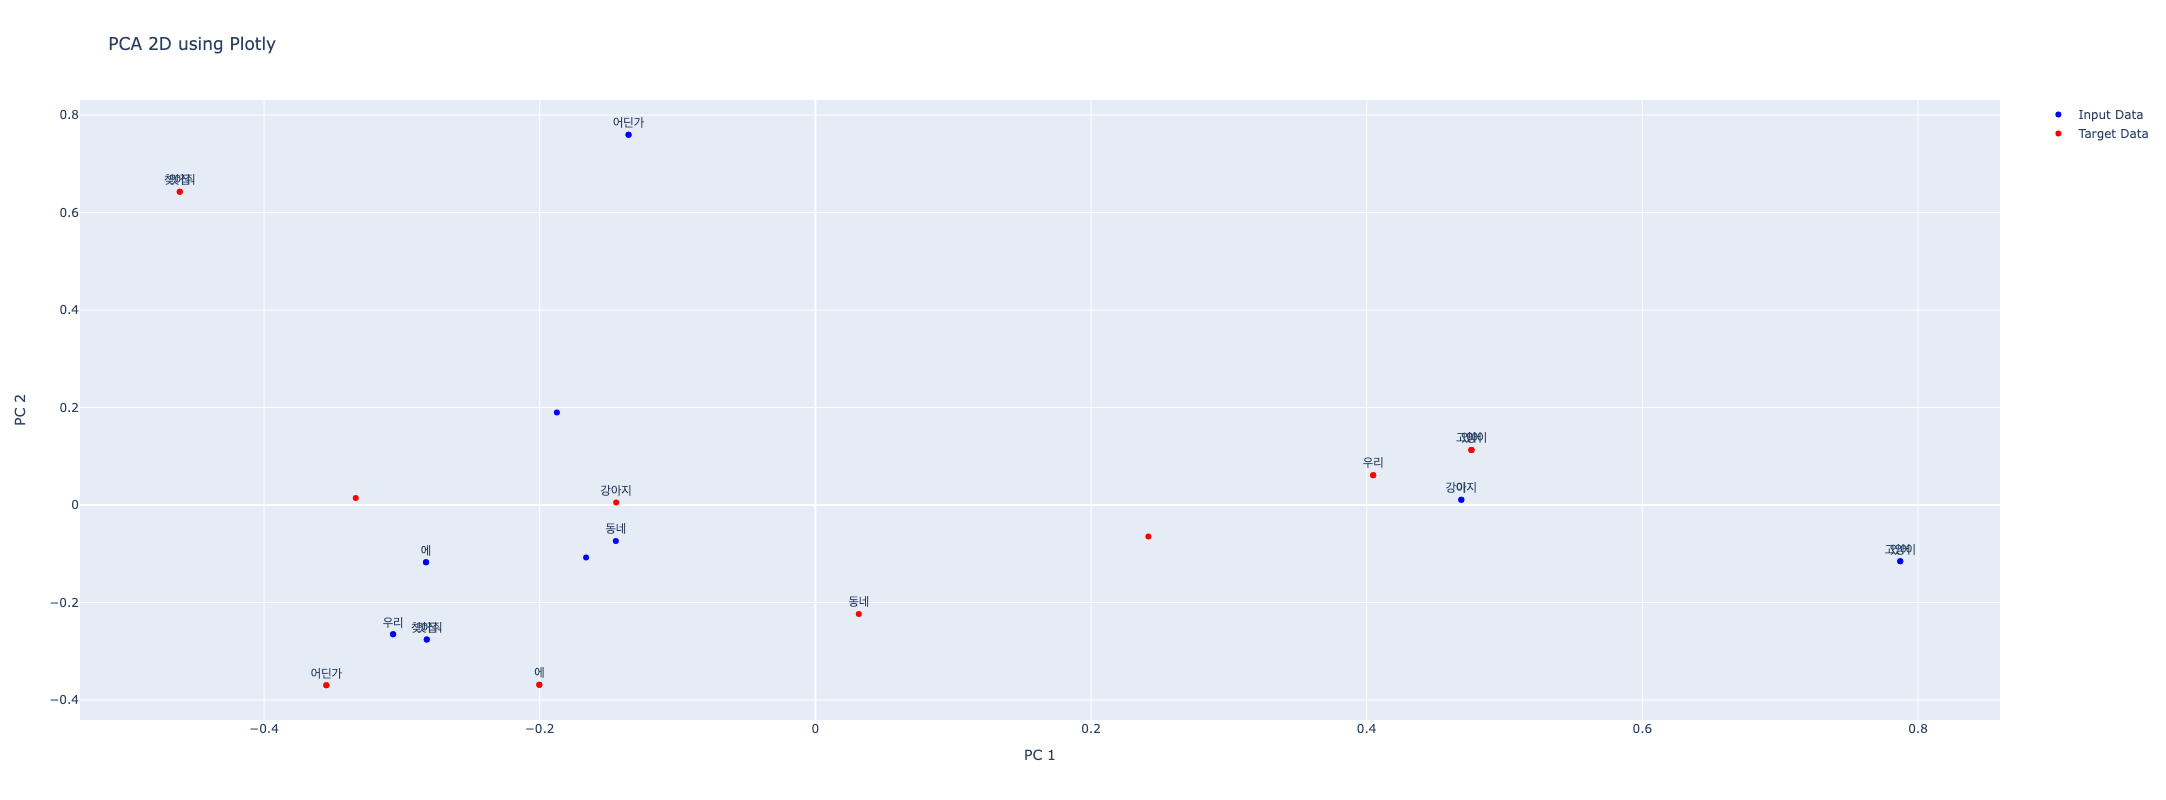

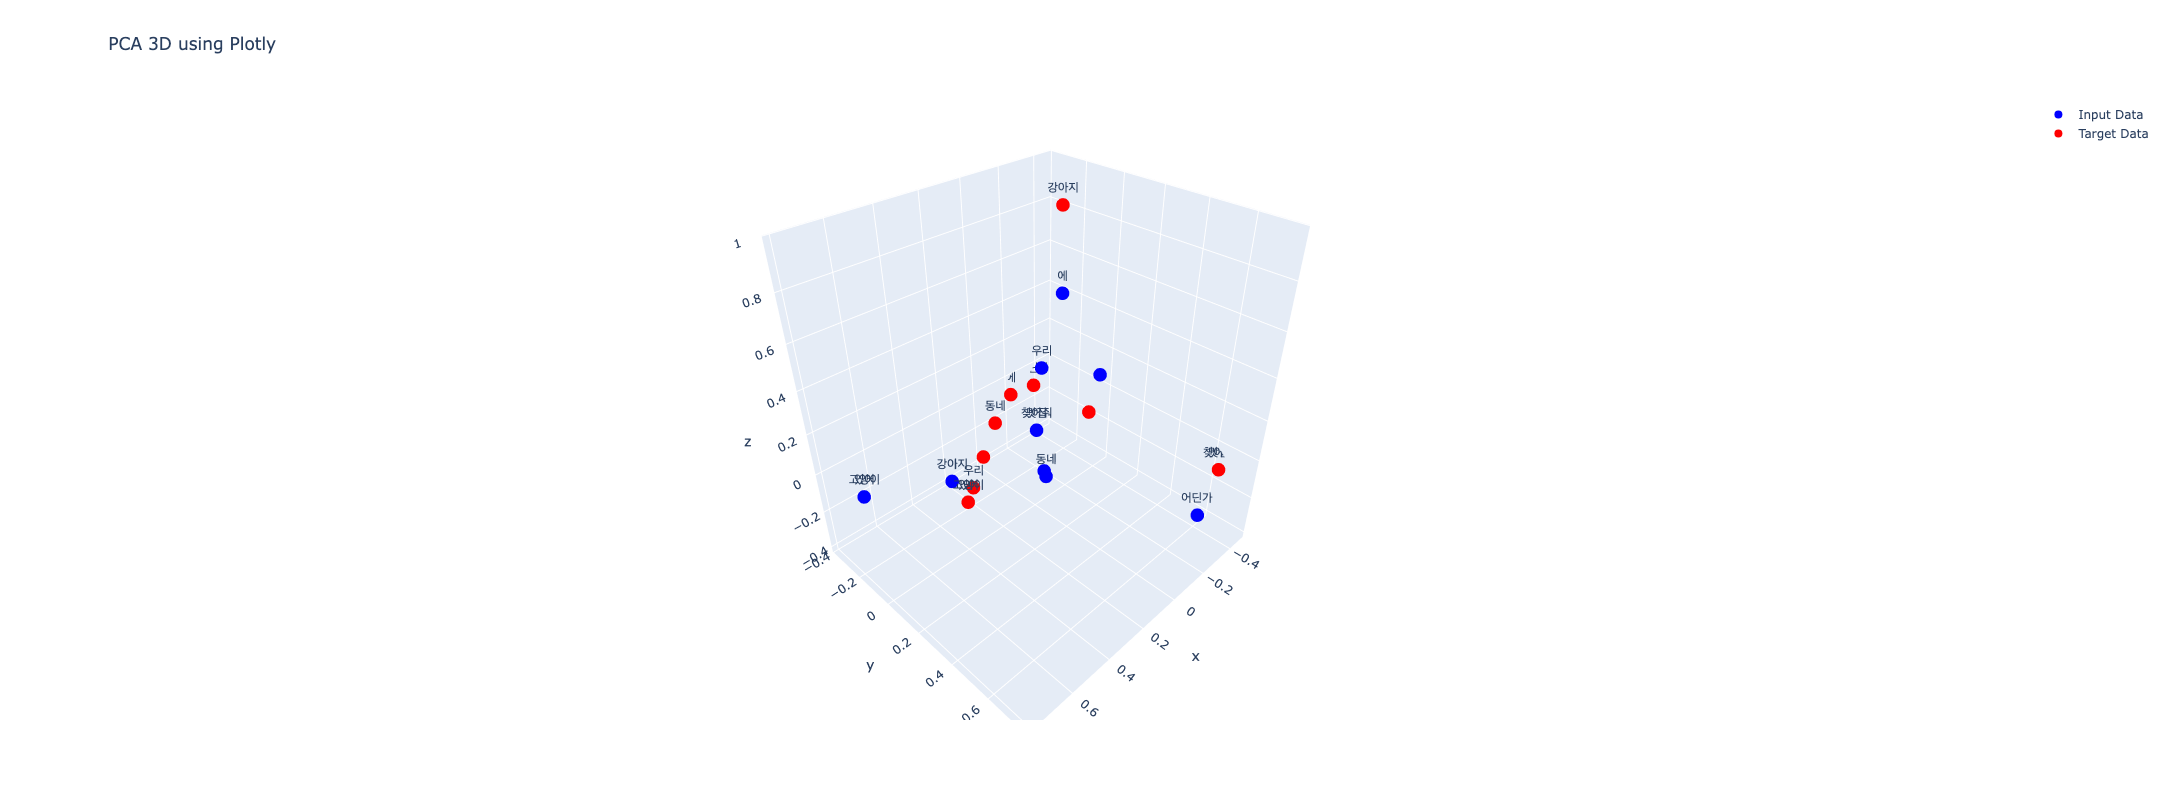

In [14]:
import plotly.graph_objects as go

# Visualization using Plotly for 2D
fig_pca_2d = go.Figure()
fig_pca_2d.add_trace(go.Scatter(x=reduced_input_2d[:, 0], y=reduced_input_2d[:, 1], mode='markers+text', 
                                marker=dict(color='blue'), text=words, textposition='top center', name='Input Data'))
fig_pca_2d.add_trace(go.Scatter(x=reduced_target_2d[:, 0], y=reduced_target_2d[:, 1], mode='markers+text', 
                                marker=dict(color='red'), text=words, textposition='top center', name='Target Data'))
fig_pca_2d.update_layout(title='PCA 2D using Plotly', xaxis_title='PC 1', yaxis_title='PC 2', width=1200, height=800)
fig_pca_2d.show()

# Visualization using Plotly for 3D
fig_pca_3d = go.Figure()
fig_pca_3d.add_trace(go.Scatter3d(x=reduced_input_3d[:, 0], y=reduced_input_3d[:, 1], z=reduced_input_3d[:, 2], 
                                  mode='markers+text', marker=dict(color='blue'), text=words, name='Input Data'))
fig_pca_3d.add_trace(go.Scatter3d(x=reduced_target_3d[:, 0], y=reduced_target_3d[:, 1], z=reduced_target_3d[:, 2], 
                                  mode='markers+text', marker=dict(color='red'), text=words, name='Target Data'))
fig_pca_3d.update_layout(title='PCA 3D using Plotly', width=1200, height=800)
fig_pca_3d.show()


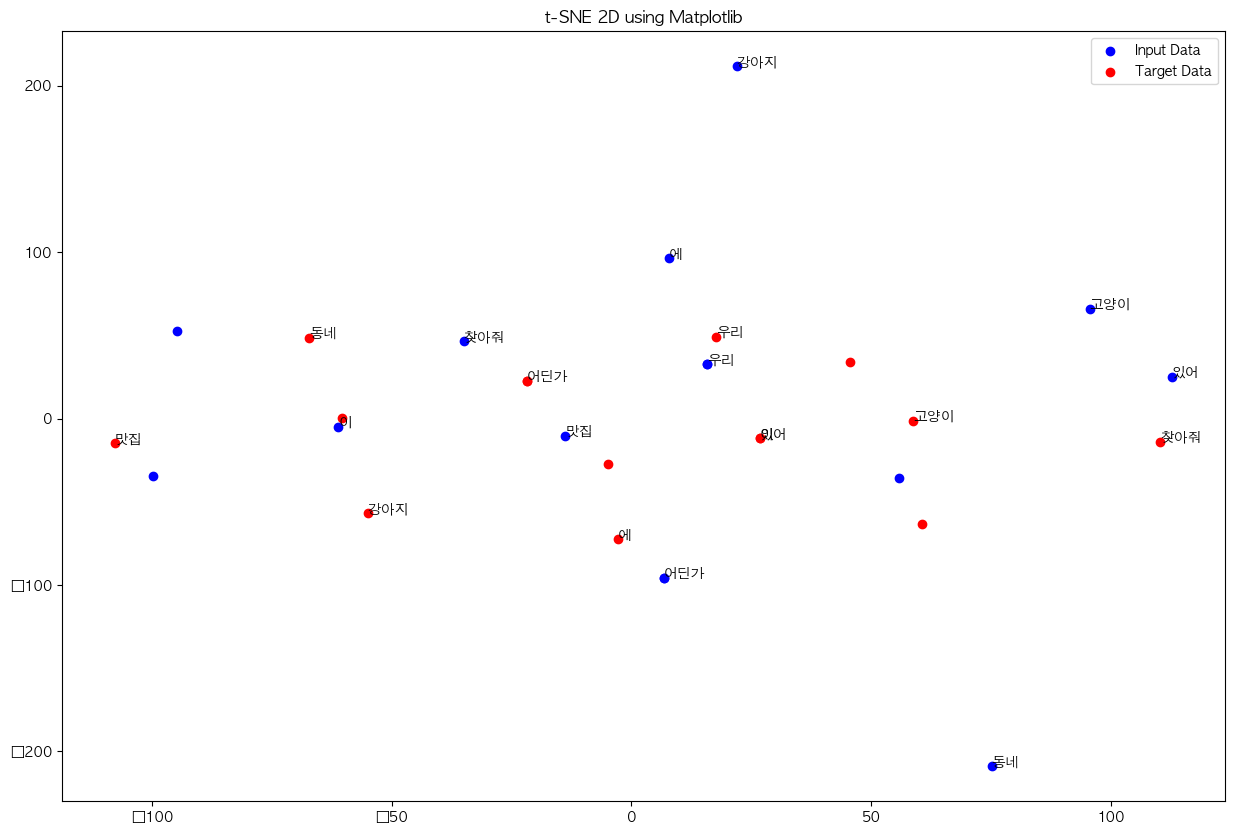

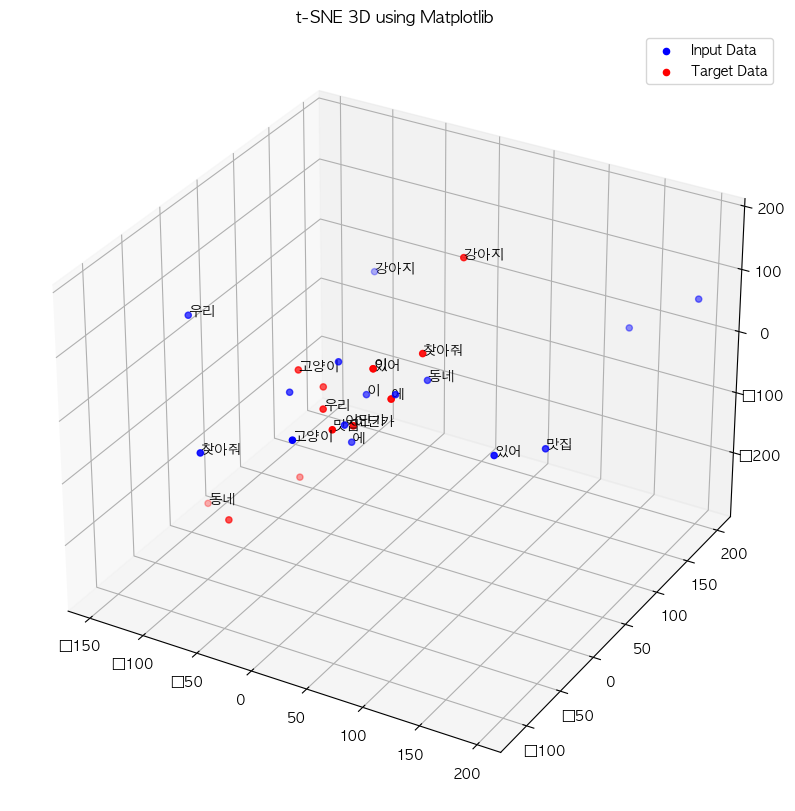

In [15]:
from sklearn.manifold import TSNE

# t-SNE for 2D
tsne_2d = TSNE(n_components=2, perplexity=len(predictions_input)//2, n_iter=300)
reduced_input_tsne_2d = tsne_2d.fit_transform(predictions_input)
reduced_target_tsne_2d = tsne_2d.fit_transform(predictions_target)

# Visualization using Matplotlib for 2D
plt.figure(figsize=(15, 10))
plt.scatter(reduced_input_tsne_2d[:, 0], reduced_input_tsne_2d[:, 1], color='blue', label='Input Data')
plt.scatter(reduced_target_tsne_2d[:, 0], reduced_target_tsne_2d[:, 1], color='red', label='Target Data')
for i, word in enumerate(words):
    plt.annotate(word, (reduced_input_tsne_2d[i, 0], reduced_input_tsne_2d[i, 1]))
    plt.annotate(word, (reduced_target_tsne_2d[i, 0], reduced_target_tsne_2d[i, 1]))
plt.legend()
plt.title('t-SNE 2D using Matplotlib')
plt.show()

# t-SNE for 3D
tsne_3d = TSNE(n_components=3, perplexity=len(predictions_input)//2, n_iter=300)
reduced_input_tsne_3d = tsne_3d.fit_transform(predictions_input)
reduced_target_tsne_3d = tsne_3d.fit_transform(predictions_target)

# Visualization using Matplotlib for 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_input_tsne_3d[:, 0], reduced_input_tsne_3d[:, 1], reduced_input_tsne_3d[:, 2], color='blue', label='Input Data')
ax.scatter(reduced_target_tsne_3d[:, 0], reduced_target_tsne_3d[:, 1], reduced_target_tsne_3d[:, 2], color='red', label='Target Data')
for i, word in enumerate(words):
    ax.text(reduced_input_tsne_3d[i, 0], reduced_input_tsne_3d[i, 1], reduced_input_tsne_3d[i, 2], word)
    ax.text(reduced_target_tsne_3d[i, 0], reduced_target_tsne_3d[i, 1], reduced_target_tsne_3d[i, 2], word)
ax.legend()
plt.title('t-SNE 3D using Matplotlib')
plt.show()


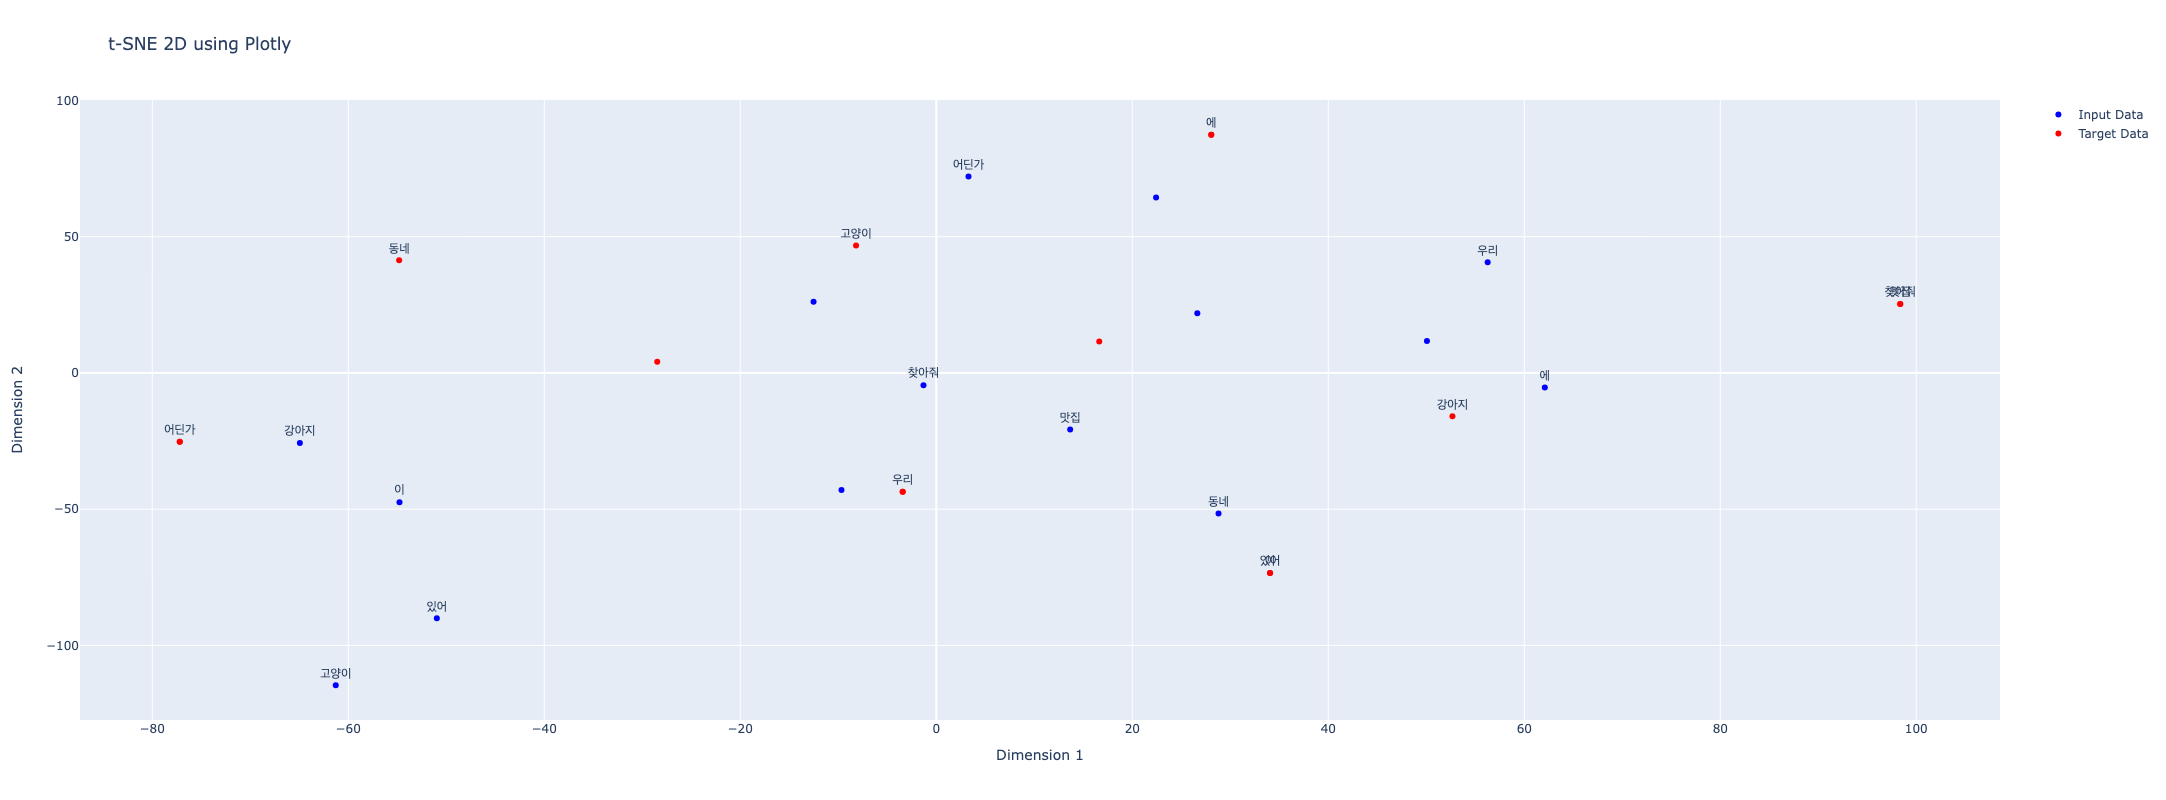

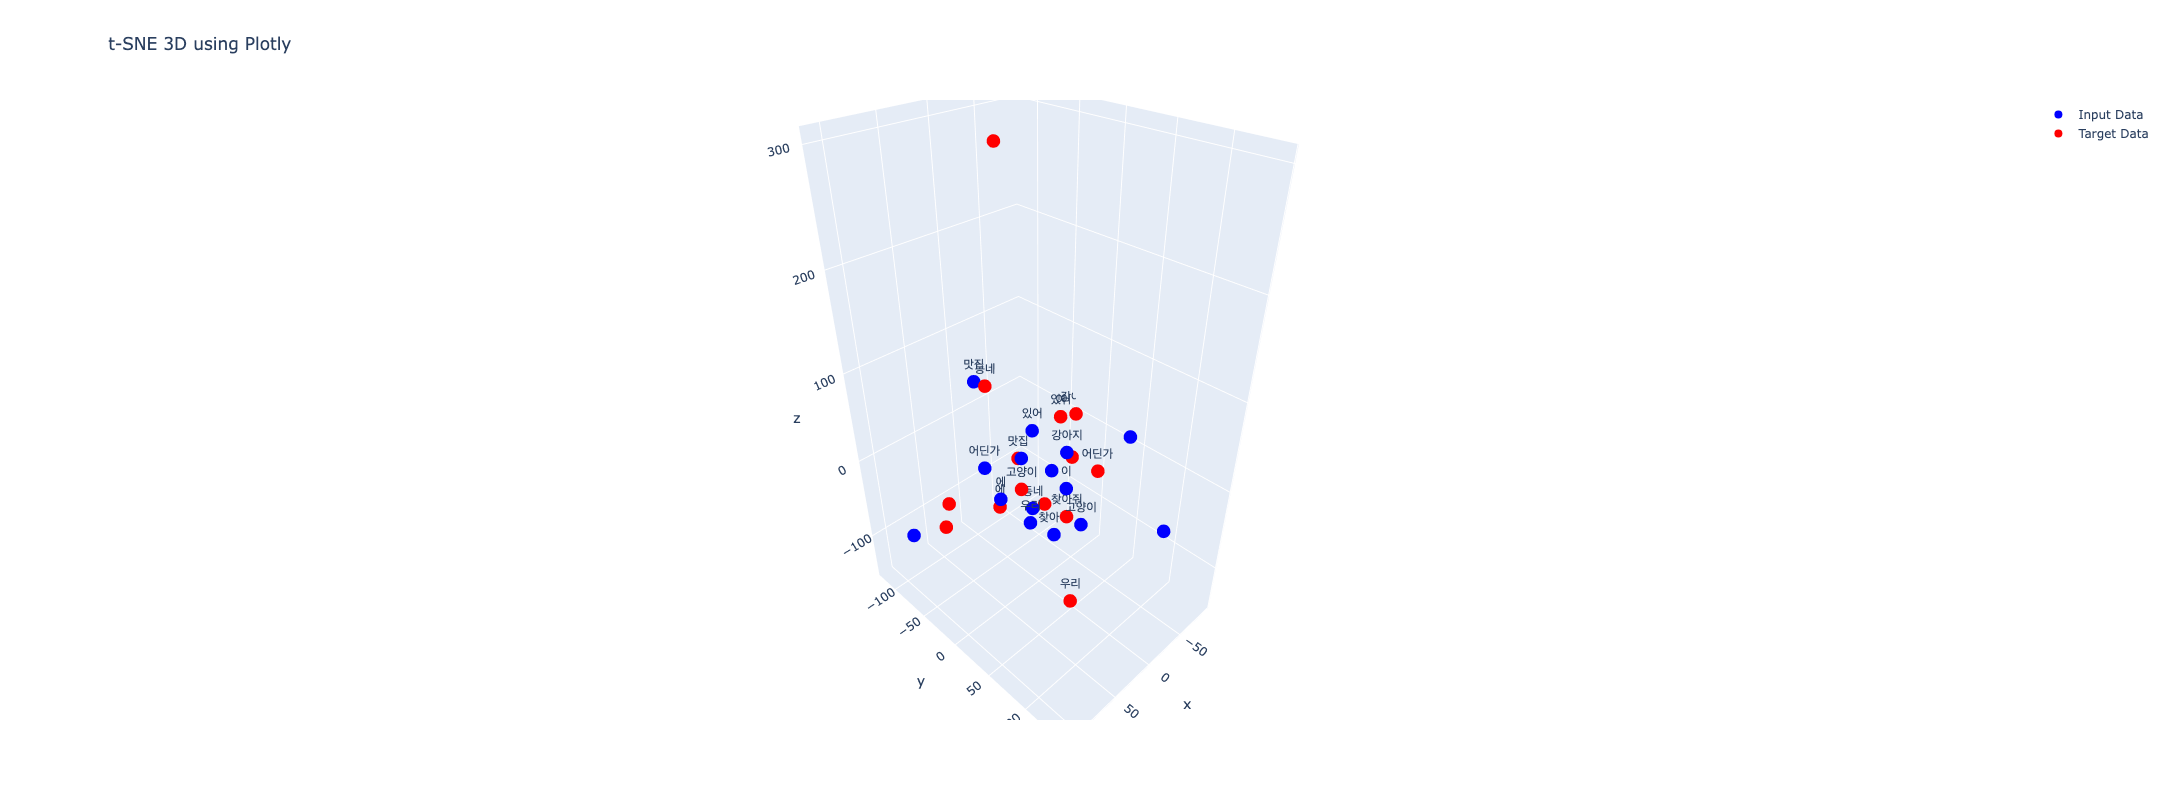

In [16]:
# Visualization using Plotly for 2D

# Adjusting perplexity for t-SNE
tsne_2d = TSNE(n_components=2, perplexity=len(predictions_input)//2, n_iter=300)

# Apply t-SNE on predictions for 2D
reduced_input_tsne_2d = tsne_2d.fit_transform(predictions_input)
reduced_target_tsne_2d = tsne_2d.fit_transform(predictions_target)

# t-SNE for 3D
tsne_3d = TSNE(n_components=3, perplexity=len(predictions_input)//2, n_iter=300)
reduced_input_tsne_3d = tsne_3d.fit_transform(predictions_input)
reduced_target_tsne_3d = tsne_3d.fit_transform(predictions_target)

fig_tsne_2d = go.Figure()
fig_tsne_2d.add_trace(go.Scatter(x=reduced_input_tsne_2d[:, 0], y=reduced_input_tsne_2d[:, 1], mode='markers+text', 
                                 marker=dict(color='blue'), text=words, textposition='top center', name='Input Data'))
fig_tsne_2d.add_trace(go.Scatter(x=reduced_target_tsne_2d[:, 0], y=reduced_target_tsne_2d[:, 1], mode='markers+text', 
                                 marker=dict(color='red'), text=words, textposition='top center', name='Target Data'))
fig_tsne_2d.update_layout(title='t-SNE 2D using Plotly', xaxis_title='Dimension 1', yaxis_title='Dimension 2', width=1200, height=800)
fig_tsne_2d.show()

# Visualization using Plotly for 3D
fig_tsne_3d = go.Figure()
fig_tsne_3d.add_trace(go.Scatter3d(x=reduced_input_tsne_3d[:, 0], y=reduced_input_tsne_3d[:, 1], z=reduced_input_tsne_3d[:, 2], 
                                   mode='markers+text', marker=dict(color='blue'), text=words, name='Input Data'))
fig_tsne_3d.add_trace(go.Scatter3d(x=reduced_target_tsne_3d[:, 0], y=reduced_target_tsne_3d[:, 1], z=reduced_target_tsne_3d[:, 2], 
                                   mode='markers+text', marker=dict(color='red'), text=words, name='Target Data'))
fig_tsne_3d.update_layout(title='t-SNE 3D using Plotly', width=1200, height=800)
fig_tsne_3d.show()
